In [1]:
#1)
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
dataset=pd.read_csv("CC GENERAL.csv", sep=",")
dataset=dataset.drop("CUST_ID", axis=1)
dataset = dataset.dropna()
dataset

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [2]:
dataset.isnull().sum()


BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [6]:
#2)
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(dataset)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric


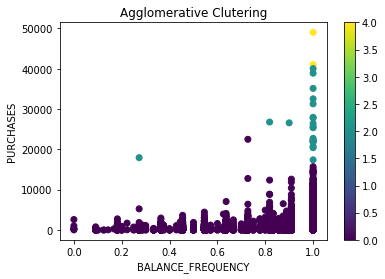

In [7]:
#3)agglomerative=pd.DataFrame(clust_labels)
agglomerative=pd.DataFrame(clust_labels)
agglomerative
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (dataset ['BALANCE_FREQUENCY'] , dataset ["PURCHASES"] , c= agglomerative[0])
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("BALANCE_FREQUENCY")
ax.set_ylabel("PURCHASES")
plt.colorbar(scatter)

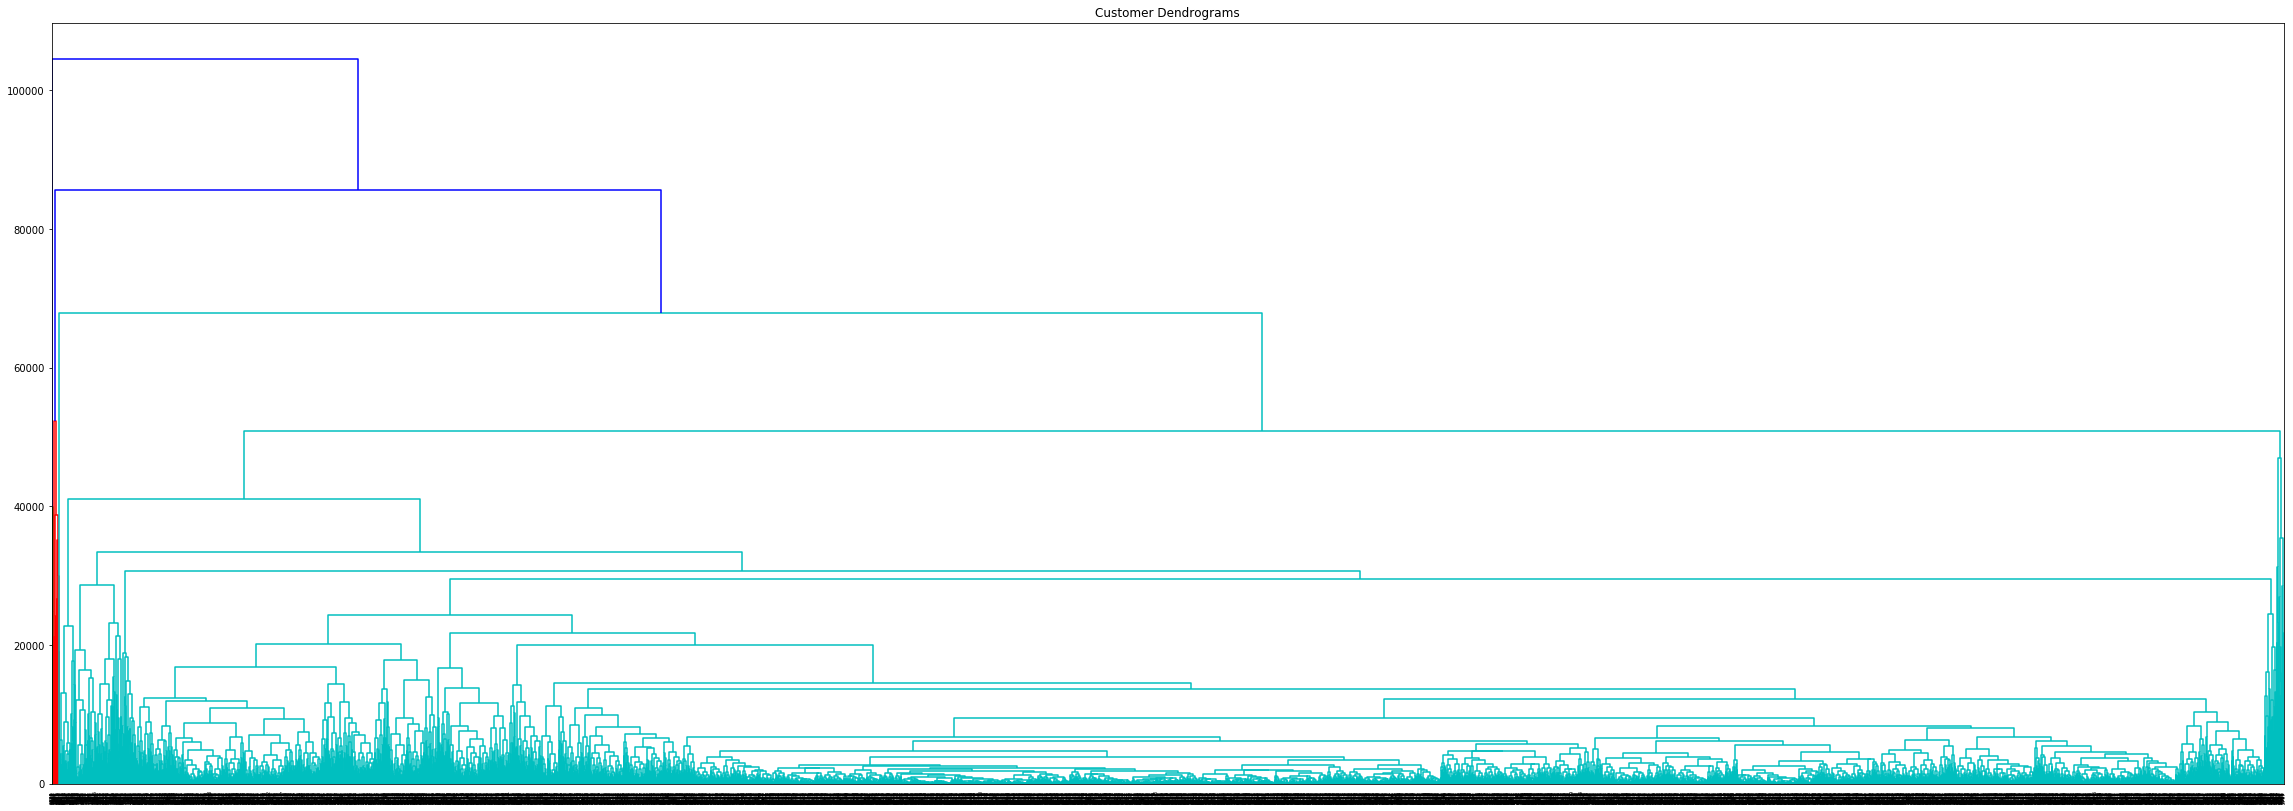

In [8]:
#4)
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(40,14))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(dataset, method="complete"))

In [9]:

from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=5, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(dataset)
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,3
1,1
2,0
3,3
4,3
...,...
8631,3
8632,3
8633,3
8634,3


In [10]:
#5)
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=3, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(dataset)
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,0
1,1
2,1
3,0
4,0
...,...
8631,0
8632,0
8633,0
8634,0


In [11]:
#6)
plt.scatter(data["Annual Income (k$)"][data.label == 0],          
            data["Spending Score (1-100)"][data.label == 0],s=80,c='magenta',label='Careful')
plt.scatter(data["Annual Income (k$)"][data.label == 1],
           data["Spending Score (1-100)"][data.label == 1],s=80,c='yellow',label='Standard')
plt.scatter(data["Annual Income (k$)"][data.label == 2],
           data["Spending Score (1-100)"][data.label == 2],s=80,c='green',label='Target')
plt.scatter(data["Annual Income (k$)"][data.label == 3], 
           data["Spending Score (1-100)"][data.label == 3],s=80,c='cyan',label='Careless')
plt.scatter(data["Annual Income (k$)"][data.label == 4], 
           data["Spending Score (1-100)"][data.label == 4],s=80,c='burlywood',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.legend()
plt.show()

NameError: name 'data' is not defined

In [ ]:
#7)Compare the two results. 
